In [1]:
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt


In [2]:
# read file
df_original=pd.read_csv("classification_2.csv",delimiter=",")

df =df_original
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.columns=[
"Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial_Status",
"Occupation", "Relationship", "Race", "Sex", "Capital_Gain", "Capital_Loss",
"Hours_per_week", "Country", "Target"]
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.Target.unique()

array([' <=50K', ' >50K'], dtype=object)

In [5]:
# df["Target"] = df["Target"].map({ " <=50K":0, " >50K":1 })
df['Target'].replace(' <=50K',0,inplace=True)
df['Target'].replace(' >50K',1,inplace=True)


df.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [6]:
df.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target             int64
dtype: object

In [7]:
df.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Country           0
Target            0
dtype: int64

In [8]:
df.duplicated().sum()

24

In [9]:
df.drop_duplicates(keep=False,inplace=True) 
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32513 entries, 0 to 32559
Data columns (total 15 columns):
Age               32513 non-null int64
Workclass         32513 non-null object
fnlwgt            32513 non-null int64
Education         32513 non-null object
Education-Num     32513 non-null int64
Martial_Status    32513 non-null object
Occupation        32513 non-null object
Relationship      32513 non-null object
Race              32513 non-null object
Sex               32513 non-null object
Capital_Gain      32513 non-null int64
Capital_Loss      32513 non-null int64
Hours_per_week    32513 non-null int64
Country           32513 non-null object
Target            32513 non-null int64
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


In [11]:
df.describe()

,Age,fnlwgt,Education-Num,Capital_Gain,Capital_Loss,Hours_per_week,Target
count,32513.000000,3.251300e+04,32513.000000,32513.000000,32513.000000,32513.000000,32513.000000
mean,38.589026,1.897870e+05,10.082613,1079.172946,87.432719,40.443207,0.241042
std,13.635737,1.055611e+05,2.570883,7390.625579,403.243596,12.346348,0.427722
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178330e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369850e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [12]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [13]:
df.shape

(32513, 15)

In [14]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


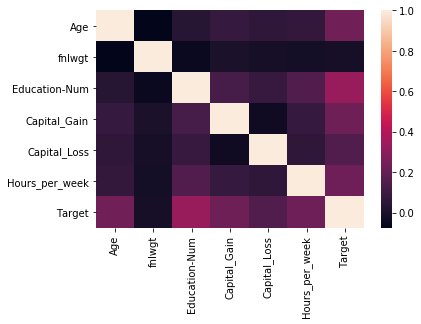

In [15]:
corr = df.corr()
sb.heatmap(corr)

In [16]:
df = pd.get_dummies(df,columns=[
    'Workclass','Education','Martial_Status','Occupation','Relationship','Race','Sex','Country'])
df.head()

,Age,fnlwgt,Education-Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
df.shape

(32513, 109)

In [18]:
corr['Target'].sort_values(ascending=False)[:]

Target            1.000000
Education-Num     0.335419
Age               0.234051
Hours_per_week    0.229627
Capital_Gain      0.223349
Capital_Loss      0.150475
fnlwgt           -0.009562
Name: Target, dtype: float64

In [19]:
df['Target'].value_counts()

0    24676
1     7837
Name: Target, dtype: int64

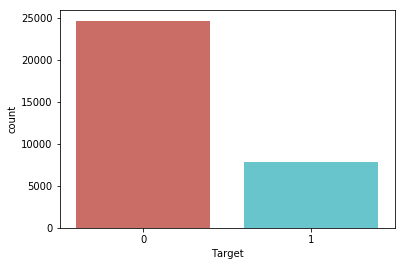

In [20]:
sb.countplot(x='Target',data=df,palette='hls')

In [21]:
def Feature_Scaling(df):
        for column in df.columns:
            df[column] = ((df[column] - df[column].min()) /
                             (df[column].max() - df[column].min()))
        return df

In [22]:
df = Feature_Scaling(df)
# print(df)

In [23]:
def Split(data):
    train_set=0.70*len(data)
    train=int(train_set)
#         print(train)
    test_set=0.30*len(data)
    test=int(test_set)
        
    return train,test

In [24]:
 train,test = Split(df)

In [25]:
train_data=df.tail(train)
test_data=df.head(test)

In [26]:
# Separating the output and the parameters data frame
def separate(df):
    output = df.Target
    return df.drop('Target', axis=1), output

x_data_train,y_data_train = separate(train_data)

In [27]:
x_data_test,y_data_test=separate(test_data)

In [87]:
import math
import operator
class KNN:
    def __init__(self):
        self.k=5
    
    
    def Euclidean(self,x_test_data,x_train_data,length):
        distance=0
        for i in range(length):
            distance+=pow(x_test_data[i]-x_train_data[i],2)
        return math.sqrt(distance)
    
    def get_neighbours(self,x_train_data,x_test_data,y_train_data):
        distance=[]
        length=len(x_test_data)-1
        for i in range(len(x_train_data)):
            dist=self.Euclidean(x_test_data,x_train_data[i],length)
#         print(dist)
            distance.append((y_train_data[i],dist))
            
        distance.sort(key=operator.itemgetter(1))
        neighbour=[]
        for i in range(self.k):
            neighbour.append(distance[i][0])
        return neighbour
        
    def getMajority(self,neighbors):
        majority = {}
        for x in range(len(neighbors)):
            response = neighbors[x]
            if response in majority:
                majority[response] += 1
            else:
                majority[response] = 1
        majority = sorted(majority.items(), key=operator.itemgetter(1), reverse=True)
        return majority[0][0]
  
    
    
    def getAccuracy(self,y_test_data, predictions):
        correct = 0
#         print("Prediction",predictions)
#         print("Y test",y_test_data)
        for x in range(len(y_test_data)):
#             for i in range(len(predictions)):
            if y_test_data[x] == predictions[x]:
                correct += 1
        return (correct/float(len(y_test_data))) * 100.0

        
def main():
    obj = KNN()
    # calling method by class object
    
    x_train_data = np.array(x_data_train[:2000])
    y_train_data = np.array(y_data_train[:2000])
       
    x_test_data = np.array(x_data_test[:200])
    y_test_data = np.array(y_data_test[:200])
    predictions=[]
    for i in range(len(x_test_data)):
        neighbours = obj.get_neighbours(x_train_data,x_test_data[i],y_train_data)
        result = obj.getMajority(neighbours)
        
        predictions.append(result)
#         print('> predicted=' + repr(result) + ', actual=' + repr(y_test_data[i]))

    accuracy =obj.getAccuracy(y_test_data, predictions)
    print('\n\nAccuracy: ' + repr(accuracy) + '%')

if __name__ == '__main__':
    main()
    



Accuracy: 82.0%
